In [695]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [696]:
sales_detail=pd.read_csv("sales_detal.csv")
customer_data=pd.read_csv("customer_data.csv")
sales_summary=pd.read_csv("sales_summary.csv")
submission=pd.read_csv("sample_submission.csv")

In [697]:
non_ids=customer_data[customer_data.isnull().any(axis=1)]['customer_id']

In [698]:
customer_data=customer_data[~customer_data.customer_id.isin(non_ids)]

In [699]:
sales_detail=sales_detail[~sales_detail.customer_id.isin(non_ids)]

In [700]:
sales_summary=sales_summary[~sales_summary.customer_id.isin(non_ids)]

In [701]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7530 entries, 0 to 7999
Data columns (total 3 columns):
customer_id    7530 non-null int64
gender         7530 non-null object
birth_year     7530 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 235.3+ KB


In [702]:
sales_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805878 entries, 0 to 843006
Data columns (total 6 columns):
customer_id                 805878 non-null int64
year                        805878 non-null int64
month                       805878 non-null int64
catagory_code               805878 non-null object
total_spent_for_category    805878 non-null float64
end_date                    805878 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 43.0+ MB


In [703]:
sales_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126183 entries, 0 to 132186
Data columns (total 8 columns):
customer_id              126183 non-null int64
year                     126183 non-null int64
month                    126183 non-null int64
weekend_amount_spent     126183 non-null float64
Num_of_weekend_visits    126183 non-null int64
total_amount_spent       126183 non-null float64
total_num_of_visits      126183 non-null int64
end_date                 126183 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 8.7+ MB


In [704]:
len(sales_detail['catagory_code'].unique())

20

In [705]:
df1=sales_detail.groupby(['catagory_code'])['total_spent_for_category'].sum()

In [706]:
customer_data['birth_year']=customer_data['birth_year'].astype(int)

In [707]:
#sorted(customer_data['birth_year'].unique())

In [708]:
customer_data['age']=2020-customer_data['birth_year']

In [709]:
customer_data['age']=customer_data['age'].astype(int)

In [710]:
#sorted(customer_data['age'].unique())

In [711]:
bins=[1930,1946,1964,1976,1995,2010]
labels=['Traditionalists','Boomers','Gen X','Gen Y','Gen Z']
customer_data['agegroup']=pd.cut(customer_data['birth_year'], bins=bins, labels=labels, right=False)
customer_data.head()

,customer_id,gender,birth_year,age,agegroup
0,167939,female,1985,35,Gen Y
1,168055,male,1966,54,Gen X
2,168227,female,1981,39,Gen Y
3,168286,female,1961,59,Boomers
4,168308,female,1970,50,Gen X


In [712]:
df=sales_detail.join(customer_data.set_index('customer_id'), on='customer_id')
df.head()

,customer_id,year,month,catagory_code,total_spent_for_category,end_date,gender,birth_year,age,agegroup
0,337134,2017,6,B117,2226.0,2017-06-30,female,1970,50,Gen X
1,950216,2018,2,B115,1131.0,2018-02-28,male,1997,23,Gen Z
2,824818,2018,2,B115,960.0,2018-02-28,female,1977,43,Gen Y
3,547554,2018,7,B115,345.0,2018-07-31,male,1958,62,Boomers
4,176602,2017,5,B115,217.5,2017-05-31,female,1955,65,Boomers


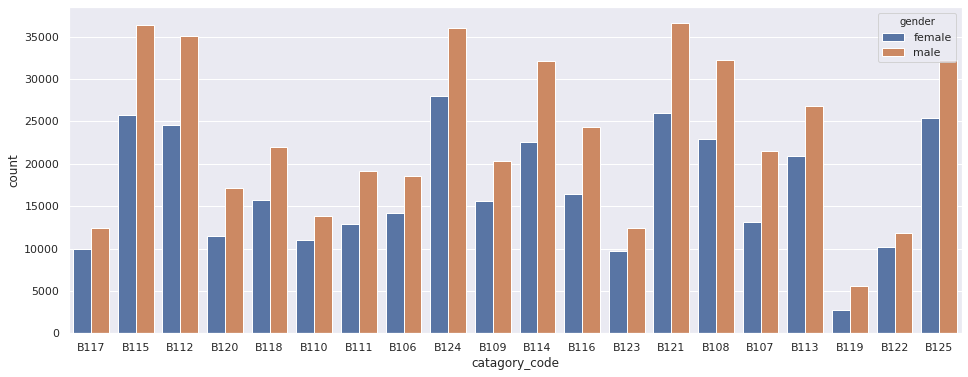

In [713]:
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="catagory_code", hue="gender", data=df)

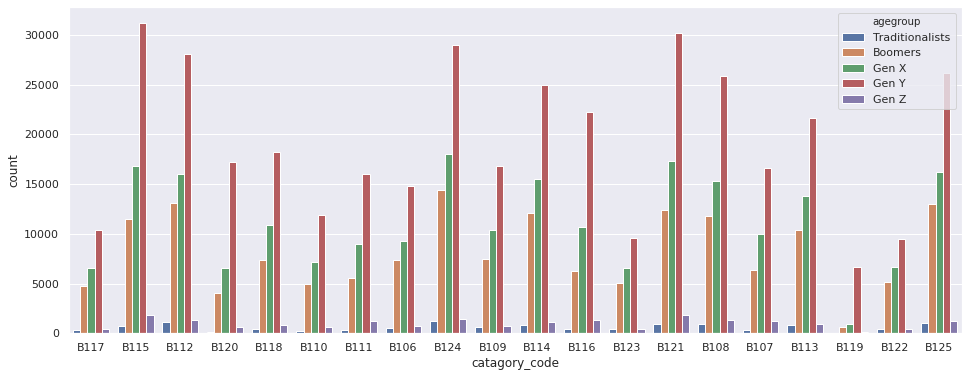

In [714]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="catagory_code", hue="agegroup", data=df)

In [715]:
sales_summary.head()

,customer_id,year,month,weekend_amount_spent,Num_of_weekend_visits,total_amount_spent,total_num_of_visits,end_date
0,519123,2019,4,13385.67,3,23558.22,10,2019/04/30
1,510205,2019,4,21662.76,3,23632.74,4,2019/04/30
2,341451,2019,4,1433.50,1,9450.19,3,2019/04/30
3,264241,2017,12,17391.91,3,32940.57,6,2017/12/31
4,207482,2017,12,10949.23,2,26126.32,7,2017/12/31


In [716]:
sales_summary['basket_value']=sales_summary['total_amount_spent']/sales_summary['total_num_of_visits']
sales_summary['basket_value_weekend']=sales_summary['weekend_amount_spent']/sales_summary['Num_of_weekend_visits']

In [717]:
sales_summary.head()

,customer_id,year,month,weekend_amount_spent,Num_of_weekend_visits,total_amount_spent,total_num_of_visits,end_date,basket_value,basket_value_weekend
0,519123,2019,4,13385.67,3,23558.22,10,2019/04/30,2355.822000,4461.890000
1,510205,2019,4,21662.76,3,23632.74,4,2019/04/30,5908.185000,7220.920000
2,341451,2019,4,1433.50,1,9450.19,3,2019/04/30,3150.063333,1433.500000
3,264241,2017,12,17391.91,3,32940.57,6,2017/12/31,5490.095000,5797.303333
4,207482,2017,12,10949.23,2,26126.32,7,2017/12/31,3732.331429,5474.615000


In [718]:
sales_summary['time']=sales_summary['year'].astype(str)+"-"+sales_summary['month'].astype(str)+"-"+"01"

sales_summary['time']=pd.to_datetime(sales_summary['time'])

basket_mean=sales_summary.groupby(['customer_id'])['basket_value'].mean()
basket_mean=basket_mean.to_frame()

In [719]:
sales_summary.head()

,customer_id,year,month,weekend_amount_spent,Num_of_weekend_visits,total_amount_spent,total_num_of_visits,end_date,basket_value,basket_value_weekend,time
0,519123,2019,4,13385.67,3,23558.22,10,2019/04/30,2355.822000,4461.890000,2019-04-01
1,510205,2019,4,21662.76,3,23632.74,4,2019/04/30,5908.185000,7220.920000,2019-04-01
2,341451,2019,4,1433.50,1,9450.19,3,2019/04/30,3150.063333,1433.500000,2019-04-01
3,264241,2017,12,17391.91,3,32940.57,6,2017/12/31,5490.095000,5797.303333,2017-12-01
4,207482,2017,12,10949.23,2,26126.32,7,2017/12/31,3732.331429,5474.615000,2017-12-01


In [725]:
df1=basket_mean.join(customer_data.set_index('customer_id'), on='customer_id',)

In [726]:
df2=sales_summary.reset_index().pivot('customer_id', 'time', 'basket_value')

In [727]:
df2 = df2.reindex(sorted(df2.columns), axis=1)
df2 = df2.fillna(0)

In [728]:
df2 = df2.sort_values(by ='customer_id')
df1 = df1.sort_values(by ='customer_id')


In [729]:
result = pd.concat([df1, df2], axis=1, join='inner')

In [734]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7530 entries, 167939 to 1124737
Data columns (total 5 columns):
basket_value    7530 non-null float64
gender          7530 non-null object
birth_year      7530 non-null int64
age             7530 non-null int64
agegroup        7530 non-null category
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 301.7+ KB


In [731]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets

In [742]:
df1['gender']=df1['gender'].astype('object')
df1['agegroup']=df1['agegroup'].astype('object')
df1.info()
labeldata=df1[["gender","agegroup"]]

labeldata=df1.select_dtypes(include=[object,bool])


from sklearn import preprocessing
labelEncoder=preprocessing.LabelEncoder()
X_2=labeldata.apply(labelEncoder.fit_transform)

df1['gender']=X_2['gender']
df1['agegroup']=X_2['agegroup']
res=df1[['gender','agegroup']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7530 entries, 167939 to 1124737
Data columns (total 5 columns):
basket_value    7530 non-null float64
gender          5218 non-null object
birth_year      7530 non-null int64
age             7530 non-null int64
agegroup        7530 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 353.0+ KB


In [750]:
kmeans = KMeans(n_clusters=2)
y=kmeans.fit_predict(res)
centroids = kmeans.cluster_centers_
print(centroids)

[[5.45045658e+01 1.51585589e+00]
 [1.56000000e+03 1.63437293e+00]]


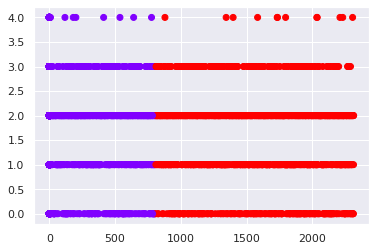

In [751]:
plt.scatter(res['gender'], res['agegroup'],c=y,cmap='rainbow')